# Frequent Pattern Matching

Steps followed:

1. Import the data. Data Source: https://github.com/gitganeshnethi/Datasets/blob/master/store_data.csv
2. Use TransactionEncoder to convert the dataset to 0/1 values.
3. Use Algorithm Apriori. (Explained below)
4. Use Algorith FPGrowth. (Explained below)

# Import Libraries

In [1]:
!pip install apyori  #This instals the Apyori package for using the Association Mining Apriori algorithm
%pip install mlxtend --upgrade

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules


  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=10ff72249a96f4cd9b8a04be1c68f4758e96c7e354528ca7f2cd1e1dd431674a
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori
     |████████████████████████████████| 1.3 MB 5.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [14]:
df = pd.read_csv('/content/groceries - groceries.csv')
df

,Item(s),Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,Item 15,Item 16,Item 17,Item 18,Item 19,Item 20,Item 21,Item 22,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,4,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,17,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,flour,coffee,red/blush wine,salty snack,chocolate,hygiene articles,napkins,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,1,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,10,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,4,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
from mlxtend.frequent_patterns import fpgrowth


In [9]:
items = (df['Item 1'].unique())


In [10]:
encoded_vals = []
for index, row in df.iterrows():
    labels = {}
    uncommons = list(set(items) - set(row))
    commons = list(set(items).intersection(row))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [11]:
freq_items = fpgrowth(ohe_df, min_support=0.02, use_colnames=True)
freq_items.head()

,support,itemsets
0,0.082766,(citrus fruit)
1,0.058566,(margarine)
2,0.139502,(yogurt)
3,0.104931,(tropical fruit)
4,0.058058,(coffee)


In [12]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(citrus fruit),(whole milk),0.082766,0.255516,0.030503,0.368550,1.442377,0.009355,1.179008
1,(whole milk),(citrus fruit),0.255516,0.082766,0.030503,0.119379,1.442377,0.009355,1.041577
2,(citrus fruit),(yogurt),0.082766,0.139502,0.021657,0.261671,1.875752,0.010111,1.165467
3,(yogurt),(citrus fruit),0.139502,0.082766,0.021657,0.155248,1.875752,0.010111,1.085803
4,(citrus fruit),(other vegetables),0.082766,0.193493,0.028876,0.348894,1.803140,0.012862,1.238674


In [13]:
sr=[]
for row in rules.itertuples():
    if(len(getattr(row,'antecedents'))==2):
        sr.append(getattr(row,'Index'))
rules.iloc[sr].sort_values(by=['confidence'],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
15,"(yogurt, other vegetables)",(whole milk),0.043416,0.255516,0.022267,0.512881,2.007235,0.011174,1.528340
91,"(root vegetables, other vegetables)",(whole milk),0.047382,0.255516,0.023183,0.489270,1.914833,0.011076,1.457687
93,"(root vegetables, whole milk)",(other vegetables),0.048907,0.193493,0.023183,0.474012,2.449770,0.013719,1.533320
17,"(yogurt, whole milk)",(other vegetables),0.056024,0.193493,0.022267,0.397459,2.054131,0.011427,1.338511
92,"(whole milk, other vegetables)",(root vegetables),0.074835,0.108998,0.023183,0.309783,2.842082,0.015026,1.290900
16,"(whole milk, other vegetables)",(yogurt),0.074835,0.139502,0.022267,0.297554,2.132979,0.011828,1.225003


In [16]:
!pip install squarify

In [17]:
#Data manipulation libraries
import pandas as pd
import numpy as np

#Visualizations
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
import squarify
import matplotlib

#for market basket analysis (using apriori)
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

#for preprocessing
from mlxtend.preprocessing import TransactionEncoder
#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
data = pd.read_csv('https://raw.githubusercontent.com/gitganeshnethi/Datasets/master/store_data.csv', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here we can find that data needs a lot of preprocessing.So let's preprocess the data.We use the TransactionEncoder() of mlxtend.preprocessing to do this work for us, if needed even we can implement the function i will provide the alternative as well.The TransactionEncoder() is an Encoder class for transaction data in Python list.It finds out what are all the different products in the transactions and will assign each transaction a list which contains a boolean array where each index represnts the corresponding product whether purchased in the transaction or not i.e. True or False.

It needs input as a python list of lists, where the outer list stores the n transactions and the inner list stores the items.

It returns the one-hot encoded boolean array of the input transactions, where the columns represent the unique items found in the input array in alphabetic order.

In [19]:
#converting into required format of TransactionEncoder()
trans=[]
for i in range(0,7501):
    trans.append([str(data.values[i,j]) for j in range(0,20)])

trans=np.array(trans)

print(trans.shape)

(7501, 20)


In [20]:
### Using TransactionEncoder

t=TransactionEncoder()
data=t.fit_transform(trans)
data=pd.DataFrame(data,columns=t.columns_,dtype=int)

data.shape

(7501, 121)

In [21]:
##here we also find nan as one of the columns so lets drop that column

data.drop('nan',axis=1,inplace=True)

In [22]:
#now lets check shape
data.shape

#lets verify whether nan is present in columns
'nan' in data.columns
#so its proved that nan is not in columns 

(7501, 120)

False

In [23]:
data.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Data Visualizations

<Figure size 1440x720 with 0 Axes>

[Text(0, 0, 'mineral water'),
 Text(0, 0, 'eggs'),
 Text(0, 0, 'spaghetti'),
 Text(0, 0, 'french fries'),
 Text(0, 0, 'chocolate'),
 Text(0, 0, 'green tea'),
 Text(0, 0, 'milk'),
 Text(0, 0, 'ground beef'),
 Text(0, 0, 'frozen vegetables'),
 Text(0, 0, 'pancakes'),
 Text(0, 0, 'burgers'),
 Text(0, 0, 'cake'),
 Text(0, 0, 'cookies'),
 Text(0, 0, 'escalope'),
 Text(0, 0, 'low fat yogurt'),
 Text(0, 0, 'shrimp'),
 Text(0, 0, 'tomatoes'),
 Text(0, 0, 'olive oil'),
 Text(0, 0, 'frozen smoothie'),
 Text(0, 0, 'turkey')]

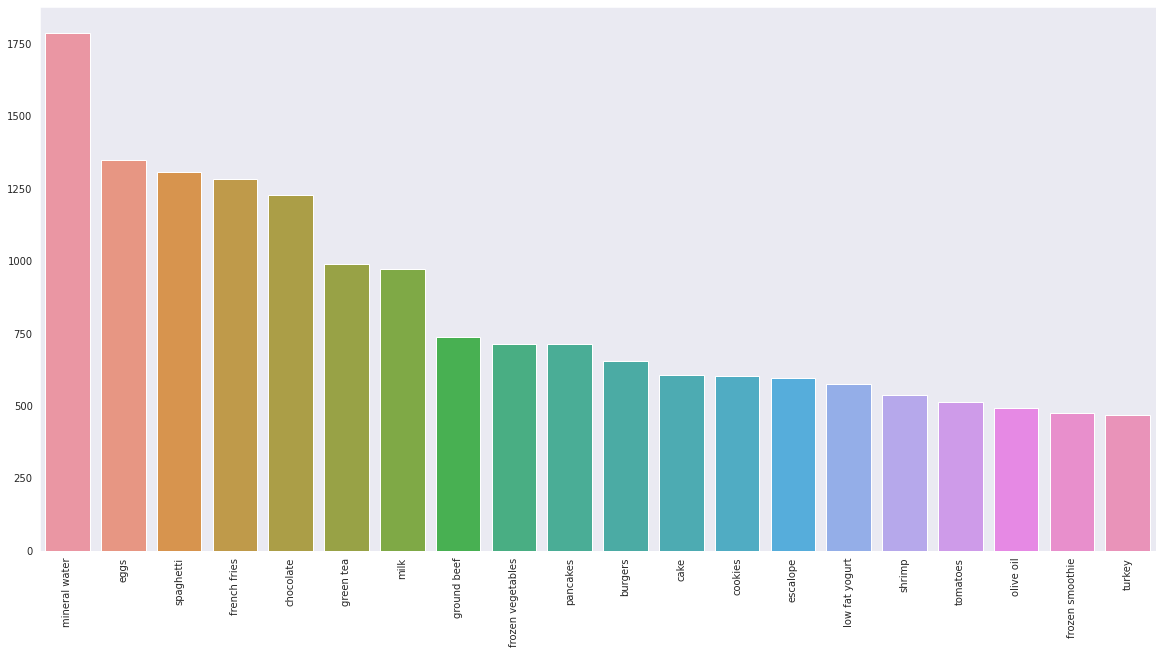

In [24]:
##Lets consider the top 20 items purchased freequently
r=data.sum(axis=0).sort_values(ascending=False)[:20]
#altering the figsize
plt.figure(figsize=(20,10))
s=sns.barplot(x=r.index,y=r.values)
s.set_xticklabels(s.get_xticklabels(), rotation=90)

# Apriori Algorithm


Apriori algorithm is a classical algorithm in data mining. It is used for mining frequent itemsets and relevant association rules. It is devised to operate on a database containing a lot of transactions, for instance, items brought by customers in a store.Association rule learning is a prominent and a well-explored method for determining relations among variables in large databases.

Rule - generation is a two step process. First is to generate frequent item set and second is to generate rules from the considered itemset.

1. Generating Frequent Itemset:
One approach to find the frequent itemsets is to check all possible subsets of the given item set and check the support value of each itemset and consider only those that have support values greater than the minimum threshold support value.

Here the Apriori uses the result of antimontone property of support and makes the generation of frequent Item set faster by reducing the search space.It has two principles:

All subsets of a frequent itemset must be frequent
Similarly, for any infrequent itemset, all its supersets must be infrequent too

Apriori principle allows us to prune all supersets of an itemset which does nogt satisfy the minimum threshold condition for support.For example if {Milk,Bread} does not satify our threshold value , then the superset of {Milk,Bread} will also not cross the threshold value there by we can just prune them away i.e. do not consider the itemsets that wil be generated from the {Milk,Bread}.

Totally 3 major steps are involved here:

* Generate all frequent itemsets each satisfying the minimum threshold and having only one item let it be L1. Next use self join and generate all possible combinations of L1 and now let the result be L2.
* At each step as we keep on generating candidate itemsets, for each candidate we scan entire database so as to know its support and remove the candidates that do not satisfy minimum threshold
Here To reduce the no of comparisions, store the generated candidate items in a Hash Tree,Instead of matching each of candidate itemsets against each transaction,match each transaction with the candidates in hash tree(there by we can enhance the speed of apriori using this method)
* In similar way create Lk from Lk-1 until the point where we are unable to apply selfjoin.

2. Generating all possible rules from Frequent Itemsets
If n items are in set I , no of possible assosciation rules possible are 3<supn</sup>- 2n+1 + 1.It becomes computationally expensive to generate all the rules and there is no meaning in genearting all that many no. of rules.

So apriori simplifies this approach by following some methodology,

Rules are formed by binary partition of each itemset.From a list of all possible candidate rules, we aim to identify rules that fall above the minimum confidence level.Just like antimontone property of support, confidence of rules generated from same itemset also follow the anti montone property. It's antimontone w.r.t no. of elements in consequent.

=> CONF(A,B,C -> D) >= CONF(B,C -> A,D) >= CONF(C -> A,B,D)

On the basis of this rules are generated.

If you want to refer further on Advanced Apriori Algorithms, Please refer to Advanced Apriori Algorithms.

Apriori uses a breadth-first search strategy to count the support of itemsets and uses a candidate generation function which exploits the downward closure property of support.

Pros of the Apriori algorithm:

It is an easy-to-implement and easy-to-understand algorithm.
It can be used on large itemsets.
Cons of the Apriori Algorithm:
Sometimes, it may need to find a large number of candidate rules which can be computationally expensive.
Calculating support is also expensive because it has to go through the entire database.
Now let's work on a dataset ...

In [26]:
#let us return items and ietmsets with atleast 5% support:
freq_items=apriori(data,min_support=0.05,use_colnames=True)

In [27]:
freq_items

,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


This tell us that there are 27 frequent itemsets of different lengths , so the first step of our apriori algorithm is finished

In [29]:
#Now let's generate association rules

res=association_rules(freq_items,metric="lift",min_threshold=1.3)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
1,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008


Above we can see the 4 rules generated with lift greater than 1.3

There is more chance of the transaction {spaghetti,mineral water} than {chocolate,mineral water} as we can find the interesting nature of rule by comparing lift,leverage and conviction of {spaghetti,mineral water} and {chocolate,mineral water}.

# Selecting and Filtering the Results

In [30]:
frequent_itemsets = apriori(data, min_support = 0.05, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


In [31]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 2) &
                   (frequent_itemsets['support'] >= 0.01) ]

,support,itemsets,length
25,0.052660,"(chocolate, mineral water)",2
26,0.050927,"(mineral water, eggs)",2
27,0.059725,"(spaghetti, mineral water)",2


In [32]:
# getting th item sets with length = 2 and support more han 10%

frequent_itemsets[ (frequent_itemsets['length'] == 1) &
                   (frequent_itemsets['support'] >= 0.01) ]


,support,itemsets,length
0,0.087188,(burgers),1
1,0.081056,(cake),1
2,0.059992,(chicken),1
3,0.163845,(chocolate),1
4,0.080389,(cookies),1
5,0.051060,(cooking oil),1
6,0.179709,(eggs),1
7,0.079323,(escalope),1
8,0.170911,(french fries),1
9,0.063325,(frozen smoothie),1


# FP GROWTH(Frequent Pattern Growth)


Shortcomings Of Apriori Algorithm

- Using Apriori needs a generation of candidate itemsets. These itemsets may be large in number if the itemset in the database is huge.

- Apriori needs multiple scans of the database to check the support of each itemset generated and this leads to high costs. These shortcomings can be overcome using the FP growth algorithm.

This algorithm is an improvement to the Apriori method. A frequent pattern is generated without the need for candidate generation. FP growth algorithm represents the database in the form of a tree called a frequent pattern tree or FP tree.

This tree structure will maintain the association between the itemsets. The database is fragmented using one frequent item. This fragmented part is called “pattern fragment”. The itemsets of these fragmented patterns are analyzed. Thus with this method, the search for frequent itemsets is reduced comparatively.

## FP TREE


Frequent Pattern Tree is a tree-like structure that is made with the initial itemsets of the database. The purpose of the FP tree is to mine the most frequent pattern. Each node of the FP tree represents an item of the itemset.

The root node represents null while the lower nodes represent the itemsets. The association of the nodes with the lower nodes that is the itemsets with the other itemsets are maintained while forming the tree.

## Frequent Pattern Algorithm Steps


The frequent pattern growth method lets us find the frequent pattern without candidate generation.

Let us see the steps followed to mine the frequent pattern using frequent pattern growth algorithm:

1) The first step is to scan the database to find the occurrences of the itemsets in the database. This step is the same as the first step of Apriori. The count of 1-itemsets in the database is called support count or frequency of 1-itemset.

2) The second step is to construct the FP tree. For this, create the root of the tree. The root is represented by null.

3) The next step is to scan the database again and examine the transactions. Examine the first transaction and find out the itemset in it. The itemset with the max count is taken at the top, the next itemset with lower count and so on. It means that the branch of the tree is constructed with transaction itemsets in descending order of count.

4) The next transaction in the database is examined. The itemsets are ordered in descending order of count. If any itemset of this transaction is already present in another branch (for example in the 1st transaction), then this transaction branch would share a common prefix to the root.

This means that the common itemset is linked to the new node of another itemset in this transaction.

5) Also, the count of the itemset is incremented as it occurs in the transactions. Both the common node and new node count is increased by 1 as they are created and linked according to transactions.

6) The next step is to mine the created FP Tree. For this, the lowest node is examined first along with the links of the lowest nodes. The lowest node represents the frequency pattern length 1. From this, traverse the path in the FP Tree. This path or paths are called a conditional pattern base.

Conditional pattern base is a sub-database consisting of prefix paths in the FP tree occurring with the lowest node (suffix).

7) Construct a Conditional FP Tree, which is formed by a count of itemsets in the path. The itemsets meeting the threshold support are considered in the Conditional FP Tree.

8) Frequent Patterns are generated from the Conditional FP Tree.


In [33]:
#Importing Libraries

from mlxtend.frequent_patterns import fpgrowth

In [34]:
#running the fpgrowth algorithm
res=fpgrowth(data,min_support=0.05,use_colnames=True)
res

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


In [35]:
res=association_rules(res,metric="lift",min_threshold=1)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158
1,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815
2,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314
3,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008
4,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357
5,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256


We could observe that {spaghetti} -> {mineral water} is mostly like to occur as we can observe it from the lift.

# Apriori Vs FP Growth


Since FP-Growth doesn't require creating candidate sets explicitly, it can be magnitudes faster than the alternative Apriori algorithm. FP-Growth is about 5 times faster.Let's look at it.

In [36]:
import time
l=[0.01,0.02,0.03,0.04,0.05]
t=[]
for i in l:
    t1=time.time()
    apriori(data,min_support=i,use_colnames=True)
    t2=time.time()
    t.append((t2-t1)*1000)

,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.010799,(barbecue sauce)
3,0.014265,(black tea)
4,0.011465,(body spray)
...,...,...
252,0.011065,"(ground beef, milk, mineral water)"
253,0.017064,"(ground beef, spaghetti, mineral water)"
254,0.015731,"(milk, spaghetti, mineral water)"
255,0.010265,"(spaghetti, mineral water, olive oil)"


,support,itemsets
0,0.020397,(almonds)
1,0.033329,(avocado)
2,0.033729,(brownies)
3,0.087188,(burgers)
4,0.030129,(butter)
...,...,...
98,0.020131,"(mineral water, whole wheat rice)"
99,0.022930,"(spaghetti, olive oil)"
100,0.025197,"(spaghetti, pancakes)"
101,0.021197,"(shrimp, spaghetti)"


,support,itemsets
0,0.033329,(avocado)
1,0.033729,(brownies)
2,0.087188,(burgers)
3,0.030129,(butter)
4,0.081056,(cake)
5,0.046794,(champagne)
6,0.059992,(chicken)
7,0.163845,(chocolate)
8,0.080389,(cookies)
9,0.051060,(cooking oil)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.046794,(champagne)
3,0.059992,(chicken)
4,0.163845,(chocolate)
5,0.080389,(cookies)
6,0.051060,(cooking oil)
7,0.179709,(eggs)
8,0.079323,(escalope)
9,0.170911,(french fries)


,support,itemsets
0,0.087188,(burgers)
1,0.081056,(cake)
2,0.059992,(chicken)
3,0.163845,(chocolate)
4,0.080389,(cookies)
5,0.051060,(cooking oil)
6,0.179709,(eggs)
7,0.079323,(escalope)
8,0.170911,(french fries)
9,0.063325,(frozen smoothie)


In [37]:
l=[0.01,0.02,0.03,0.04,0.05]
f=[]
for i in l:
    t1=time.time()
    fpgrowth(data,min_support=i,use_colnames=True)
    t2=time.time()
    f.append((t2-t1)*1000)

,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
252,0.011465,"(burgers, cake)"
253,0.014131,"(cake, green tea)"
254,0.010265,"(frozen vegetables, cake)"
255,0.011865,"(pancakes, cake)"


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
...,...,...
98,0.040928,"(ground beef, mineral water)"
99,0.039195,"(ground beef, spaghetti)"
100,0.021997,"(ground beef, milk)"
101,0.023064,"(ground beef, chocolate)"


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.033329,(avocado)
9,0.031862,(cottage cheese)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.047460,(honey)
7,0.042528,(salmon)
8,0.179709,(eggs)
9,0.087188,(burgers)


,support,itemsets
0,0.238368,(mineral water)
1,0.132116,(green tea)
2,0.076523,(low fat yogurt)
3,0.071457,(shrimp)
4,0.065858,(olive oil)
5,0.063325,(frozen smoothie)
6,0.179709,(eggs)
7,0.087188,(burgers)
8,0.062525,(turkey)
9,0.129583,(milk)


Text(0.5, 0, 'Min_support Threshold')

Text(0, 0.5, 'Run Time in ms')

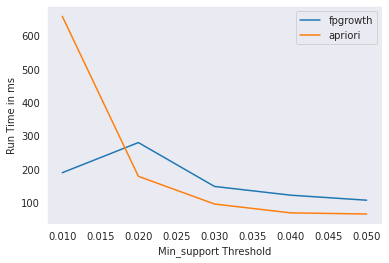

In [38]:
sns.lineplot(x=l,y=f,label="fpgrowth")
sns.lineplot(x=l,y=t,label="apriori")
plt.xlabel("Min_support Threshold")
plt.ylabel("Run Time in ms")

We can gain the required insights from the above graph about the run time comparision between the apriori and fpgrowth.

# References

1. https://webfocusinfocenter.informationbuilders.com/wfappent/TLs/TL_rstat/source/marketbasket49.htm
2. https://www.hackerearth.com/blog/developers/beginners-tutorial-apriori-algorithm-data-mining-r-implementation/
3. https://www.newgenapps.com/blog/application-of-market-basket-analysis
4. http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
5. https://en.wikipedia.org/wiki/Association_rule_learning
6. https://towardsdatascience.com/association-rules-2-aa9a77241654
7. https://www.youtube.com/watch?v=yCbankIouUU